In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("all_data.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
df.shape

(186850, 6)

In [4]:
all_data = df.dropna()

In [5]:
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [6]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data['Hour'] = all_data['Order Date'].dt.hour

In [7]:
def get_city(address):
    return address.split(',')[1].strip()
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


In [8]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,20,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,16,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,7,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,17,San Francisco (CA)


Sales by Month

/tmp/ipykernel_15236/594067215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')


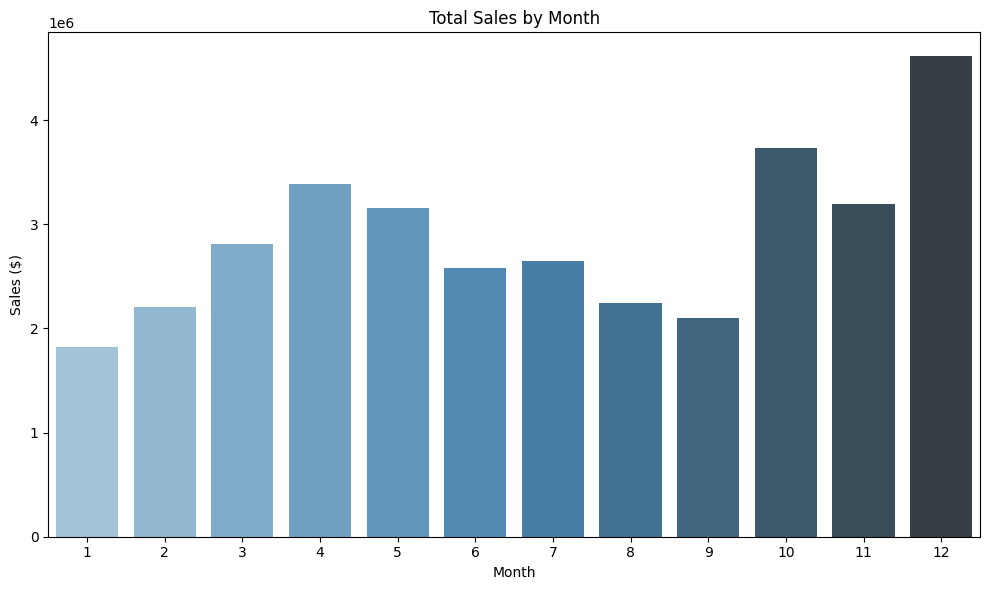

In [9]:
monthly_sales = all_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

Sales by City

/tmp/ipykernel_15236/344867515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')


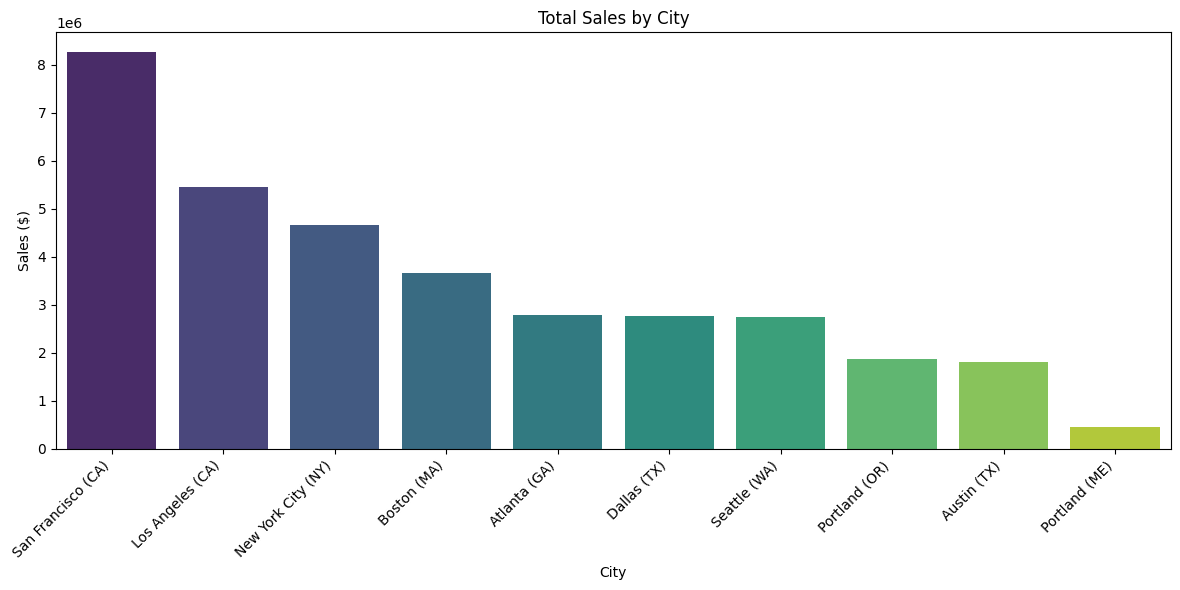

In [10]:
city_sales = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hourly orders patterns

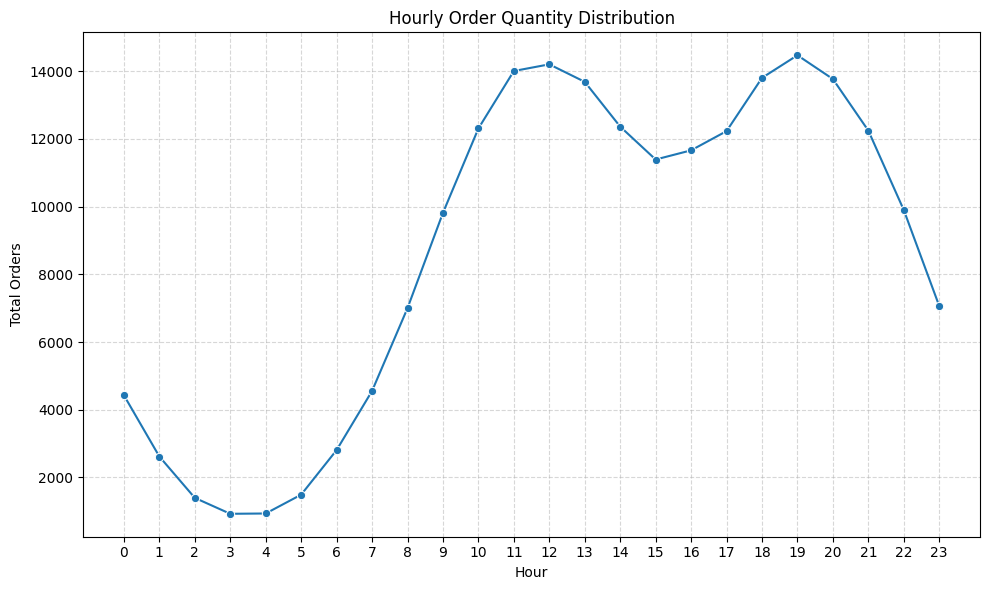

In [11]:
hourly_orders = all_data.groupby('Hour')['Quantity Ordered'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o')
plt.title('Hourly Order Quantity Distribution')
plt.xlabel('Hour')
plt.ylabel('Total Orders')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Top-Selling Products

/tmp/ipykernel_15236/2512159644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_group.index[:15], x=product_group['Quantity Ordered'][:15], palette='magma')


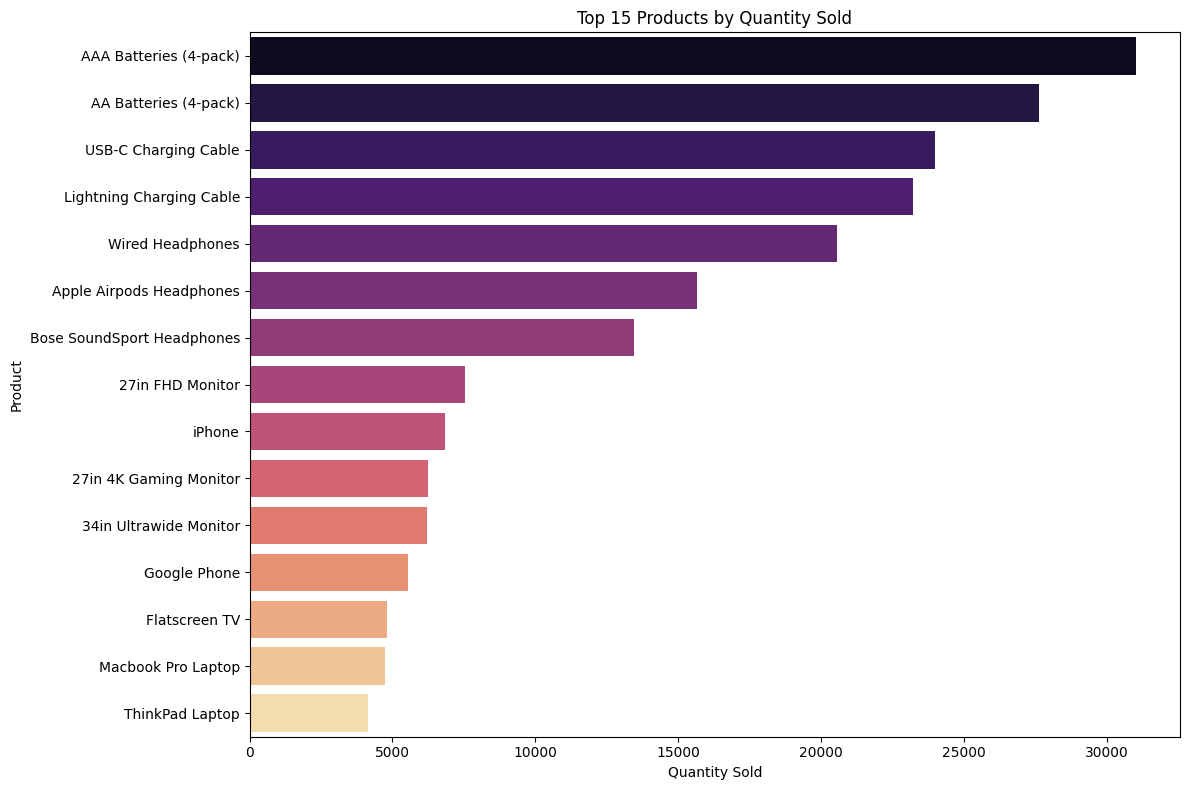

In [12]:
product_group = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).sort_values('Quantity Ordered', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y=product_group.index[:15], x=product_group['Quantity Ordered'][:15], palette='magma')
plt.title('Top 15 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Price vs Quantity Order

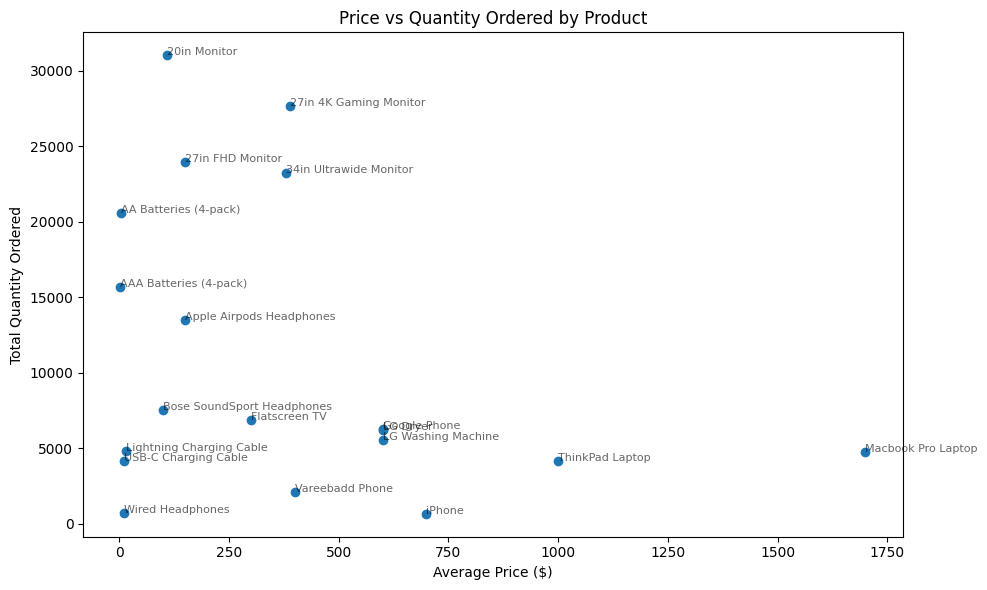

In [13]:
prices = all_data.groupby('Product')['Price Each'].mean()
quantities = product_group['Quantity Ordered']
plt.figure(figsize=(10,6))
plt.scatter(prices, quantities)
plt.title('Price vs Quantity Ordered by Product')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Quantity Ordered')
for i, product in enumerate(prices.index):
    plt.annotate(product, (prices[i], quantities[i]), fontsize=8, alpha=0.6)
plt.tight_layout()
plt.show()